In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

Load the data

In [2]:
path = '/Users/jaimerd/Desktop/master/data mining/sales_data.csv'
data = pd.read_csv(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


**Summary of categorical variables**

In [4]:
categorical_summary = {}
for column in data.select_dtypes(include=['object']):
    value_counts = data[column].value_counts()
    missing_values = data[column].isnull().sum()
    categorical_summary[column] = {"Value Counts": value_counts, "Missing Values": missing_values}

print(categorical_summary)

{'flag': {'Value Counts': Y    20000
N    20000
Name: flag, dtype: int64, 'Missing Values': 0}, 'gender': {'Value Counts': M    22019
F    16830
U     1151
Name: gender, dtype: int64, 'Missing Values': 0}, 'education': {'Value Counts': 2. Some College    11400
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64, 'Missing Values': 741}, 'age': {'Value Counts': 5_<=55    8103
4_<=45    7115
1_Unk     6709
6_<=65    5907
3_<=35    4984
7_>65     4822
2_<=25    2360
Name: age, dtype: int64, 'Missing Values': 0}, 'online': {'Value Counts': Y    27319
N    12681
Name: online, dtype: int64, 'Missing Values': 0}, 'marriage': {'Value Counts': Married    20891
Single      5082
Name: marriage, dtype: int64, 'Missing Values': 14027}, 'child': {'Value Counts': Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64, 'Missing Values': 0}, 'occupation': {'Value Counts': Professional     14936
Sales/Service    

**Data Understanding**

/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/1971396642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette="Set2")
/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/1971396642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette="Set2")
/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/1971396642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette="Set2")
/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn

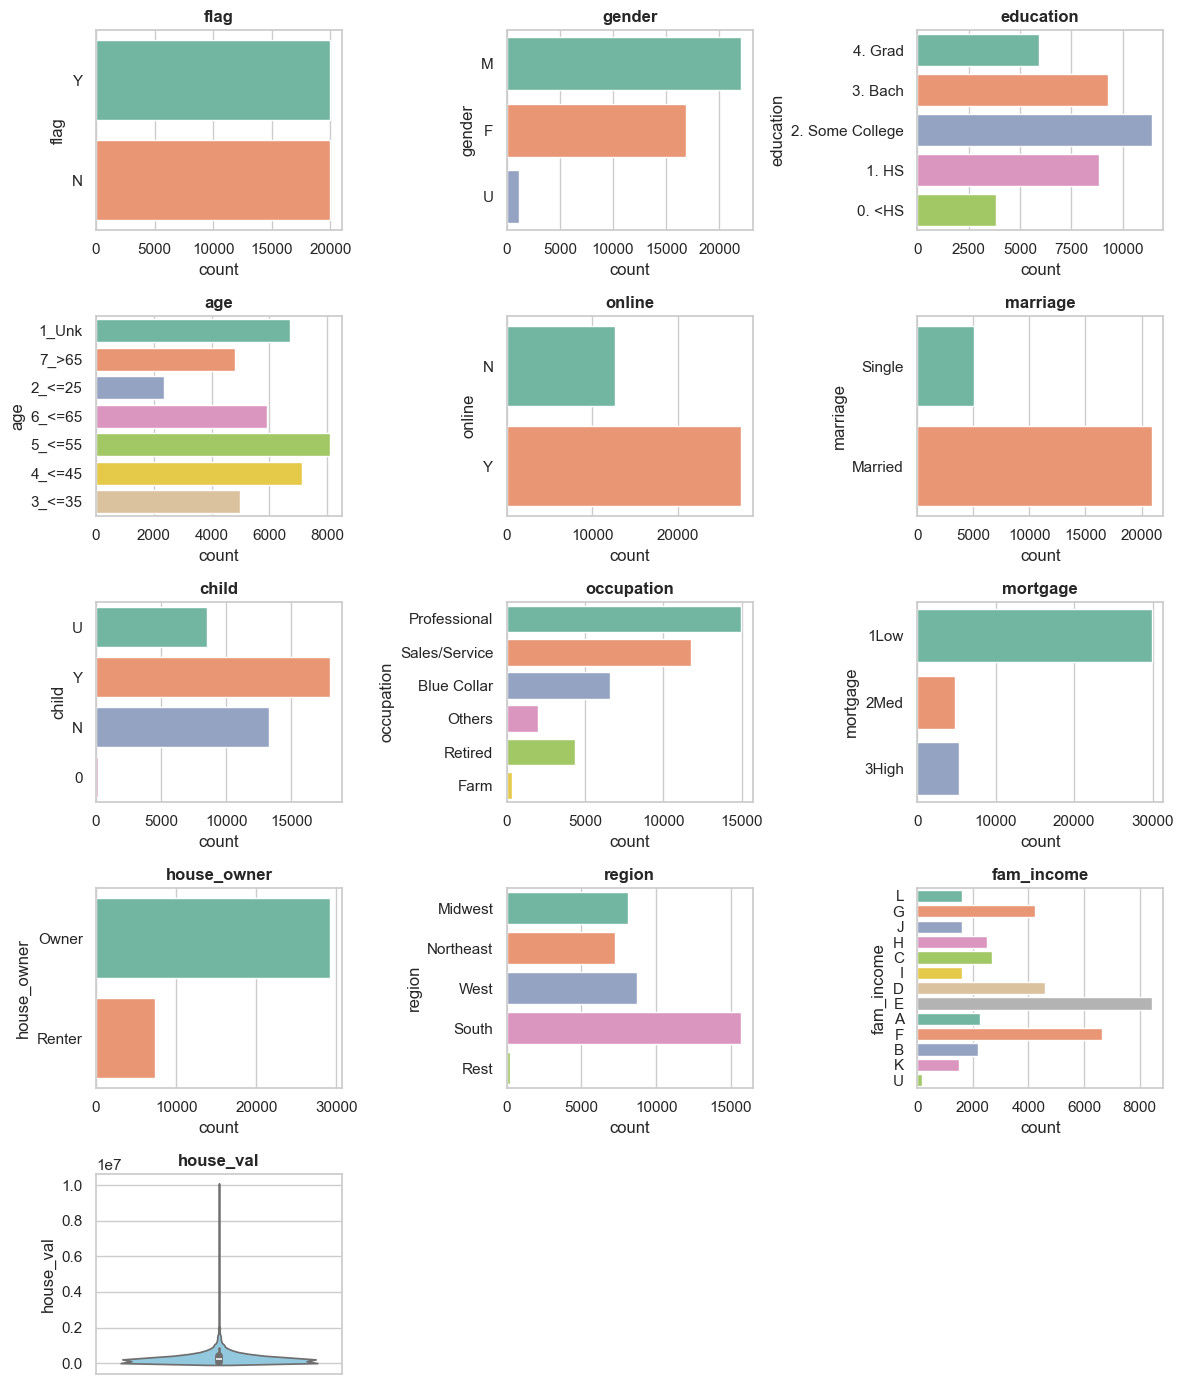

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 14))

categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
numerical_columns = ['house_val']

rows, cols = 5, 3

for index, column in enumerate(categorical_columns):
    plt.subplot(rows, cols, index + 1)
    sns.countplot(y=column, data=data, palette="Set2")
    plt.title(f'{column}', fontweight='bold')
    plt.tight_layout()

plt.subplot(rows, cols, len(categorical_columns) + 1)
sns.violinplot(y=data['house_val'], color="skyblue")
plt.title(f'{numerical_columns[0]}', fontweight='bold')
plt.tight_layout()

plt.show()

# Data cleaning

**Incorrect Data, Unkown values and missing values**

Unknown values are converted into missing values because they do not provide useful information. Then missing values are replaced by the mode. 

In [6]:
def replace (data, column, old_value, new_value):
  data[column] = data[column].replace(old_value, new_value)
  return data

replace(data, "education", '0. <HS', 'Lower than High School')
replace(data, "education", '1. HS', 'High School')
replace(data, "education", '2. Some College', 'College')
replace(data, "education", '3. Bach', 'Bachelor' )
replace(data, "education", '4. Grad', 'Graduate' )
replace(data, "gender", 'M', 'Male')
replace(data, "gender", 'F', 'Female')
replace(data, "gender", 'U', 'Unknown')
replace(data, "age", '2_<=25', 'Young (0,25]')
replace(data, "age", '3_<=35', 'Young Adult (25,35]')
replace(data, "age", '4_<=45', 'Adult (35, 45]')
replace(data, "age", '5_<=55', 'Adult II (45,55]')
replace(data, "age", '6_<=65', 'Senior (55,65]')
replace(data, "age", '7_>65', 'Retired (more than 65)')
replace(data, "age", '1_Unk', 'Unknown')
replace(data, "online", "Y", "Yes")
replace(data, "online", "N", "No")
replace(data, "child", "Y", "Yes")
replace(data, "child", '0', 'No')
replace(data, "child", 'U', 'Unknown')
replace(data, "child", 'N', 'No')
replace(data, "flag", "Y", "Yes")
replace(data, "flag", "N", "No")
replace(data, "fam_income", "U", "Unknown")

data = data.replace('Unknown', np.nan)

variables = ['gender','age','child','education', 'marriage', 'house_owner', 'fam_income']
moda_imputer = SimpleImputer(strategy='most_frequent')

data[variables] = moda_imputer.fit_transform(data[variables])



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    40000 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     40000 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  40000 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


In [8]:
100 * data.isnull().sum() / len(data)

flag           0.0
gender         0.0
education      0.0
house_val      0.0
age            0.0
online         0.0
marriage       0.0
child          0.0
occupation     0.0
mortgage       0.0
house_owner    0.0
region         0.0
fam_income     0.0
dtype: float64

## Descriptive Analysis 

**Correlation measures**

In [9]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

variables = ['flag', 'gender', 'online', 'marriage','child', 'house_owner']

data_encoded = pd.DataFrame()
le = LabelEncoder()
for var in variables:
      data_encoded[var] = le.fit_transform(data[var])


phi_coefficients = {}
for var in variables[1:]:
    crosstab = pd.crosstab(data_encoded[var], data_encoded['flag'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    phi = np.sqrt(chi2 / data.shape[0])
    phi_coefficients[var] = phi

phi_df = pd.DataFrame(list(phi_coefficients.items()), columns=['Variable', 'Phi Coefficient'])

print(phi_df)

      Variable  Phi Coefficient
0       gender         0.187723
1       online         0.213940
2     marriage         0.029202
3        child         0.054866
4  house_owner         0.119166


In [10]:
from scipy.stats import pointbiserialr

data1 = data.copy()
data1['flag_encoded'] = data1['flag'].map({'Yes': 1, 'No': 0})

correlation, p_value = pointbiserialr(data1['flag_encoded'], data1['house_val'])

# Imprime el coeficiente de correlación y el valor p
print(f"Correlación punto biserial: {correlation}")
print(f"Valor p: {p_value}")

Correlación punto biserial: 0.16800331188948006
Valor p: 5.0245431658016346e-251


In [11]:
variables = ['flag', 'fam_income']

data_encoded1 = pd.DataFrame()
le = LabelEncoder()
for var in variables:
      data_encoded1[var] = le.fit_transform(data[var])

correlation, p_value = pointbiserialr(data_encoded1['flag'], data_encoded1['fam_income'])

print(f"Correlación: {correlation}")
print(f"Valor p: {p_value}")



Correlación: 0.23782674226493283
Valor p: 0.0


**Visualizations**

/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/3699662338.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='flag', y='house_val', data=data, palette="tab10")


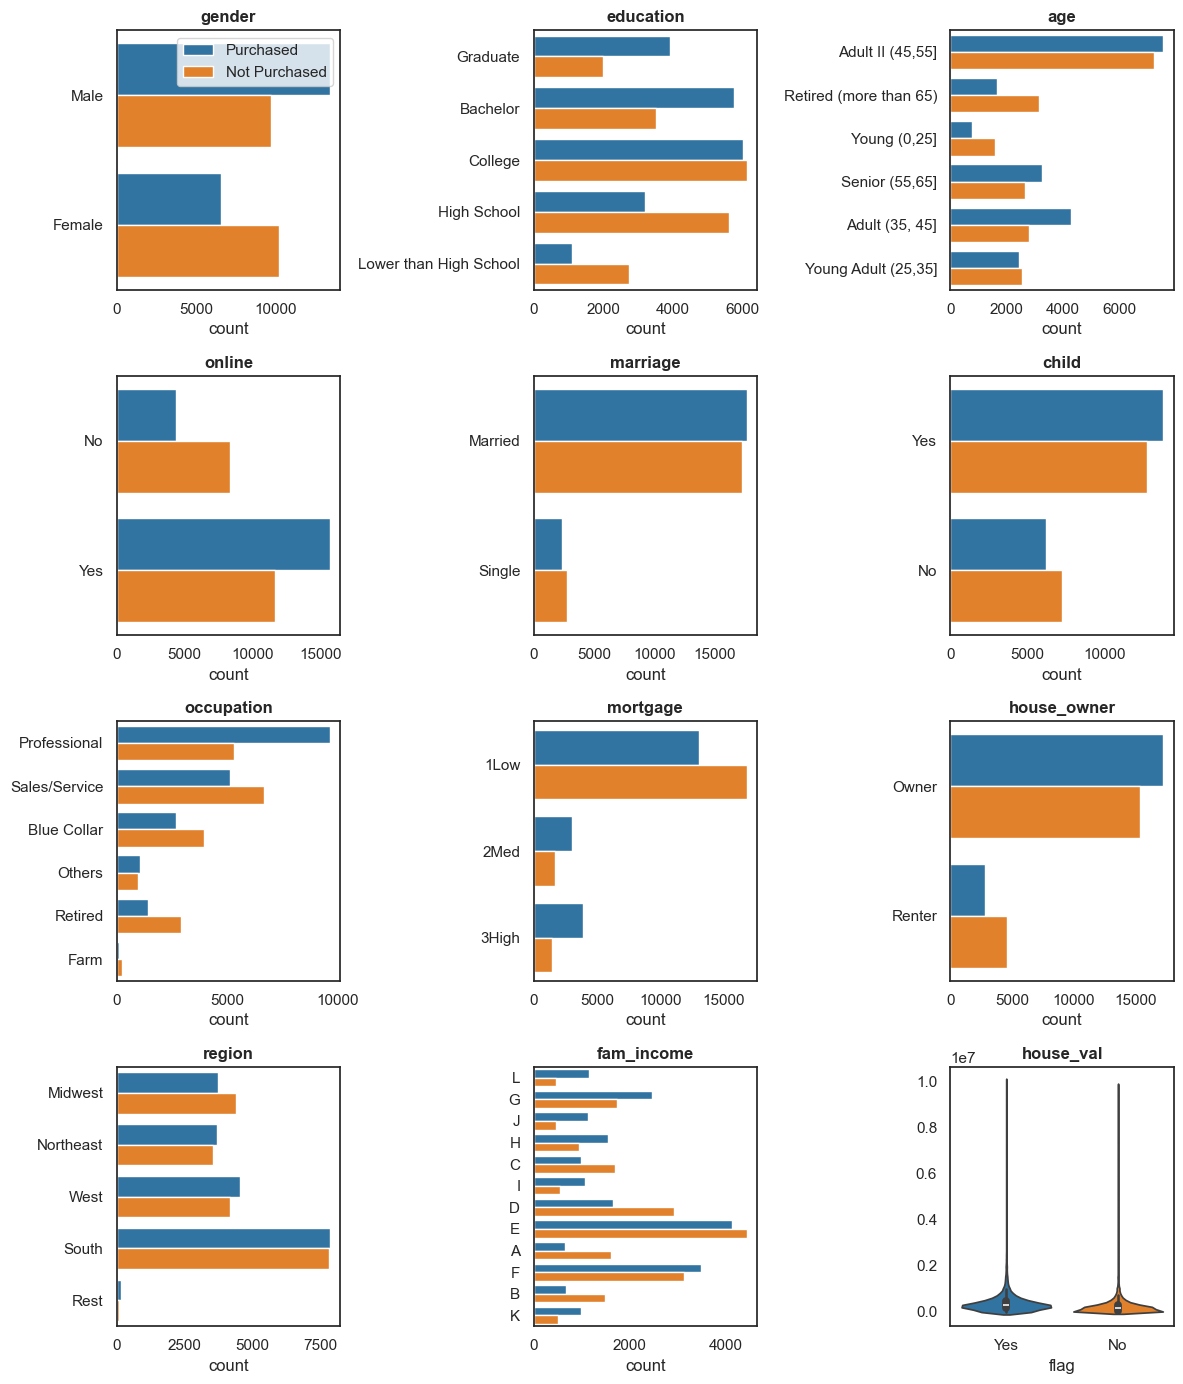

In [12]:
sns.set(style="white")
plt.figure(figsize=(12, 14))

categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and col != 'flag']
numerical_columns = ['house_val']

rows, cols = 4, 3

for index, column in enumerate(categorical_columns):
    ax = plt.subplot(rows, cols, index + 1)
    sns.countplot(y=column, data=data, palette="tab10", hue='flag')
    plt.title(f'{column}', fontweight='bold')
    ax.set_ylabel('')
    if index != 0:
        ax.get_legend().remove()
    else:

        handles, labels = ax.get_legend_handles_labels()
        new_labels = ['Purchased' if label == 'Yes' else 'Not Purchased' for label in labels]
        ax.legend(handles, new_labels)
    plt.tight_layout()


ax = plt.subplot(rows, cols, len(categorical_columns) + 1)
sns.violinplot(x='flag', y='house_val', data=data, palette="tab10")
plt.title(f'{numerical_columns[0]}', fontweight='bold')
ax.set_ylabel('')
plt.tight_layout()


handles, labels = ax.get_legend_handles_labels()
new_labels = ['Purchased' if label == 'Yes' else 'Not Purchased' for label in labels]

plt.show()

In [13]:
import pandas as pd

categorical_columns = [ 'occupation', 'region', 'mortgage', 'education', 'gender', 'online', 'house_owner', 'fam_income']  # etc.

conversion_rates = {}

for column in categorical_columns:

    contingency_table = pd.crosstab(data[column], data['flag'])
    conversion_rate = (contingency_table['Yes'] / (contingency_table['Yes'] + contingency_table['No'])) * 100
    conversion_rates[column] = conversion_rate

conversion_df = pd.DataFrame(conversion_rates)



/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/2725415794.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage of Purchases', y=category, data=percentage_purchases, palette="Set2", ax=ax)
/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/2725415794.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage of Purchases', y=category, data=percentage_purchases, palette="Set2", ax=ax)
/var/folders/6h/lh0bysyd2t359_34zq57v25m0000gn/T/ipykernel_5184/2725415794.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effe

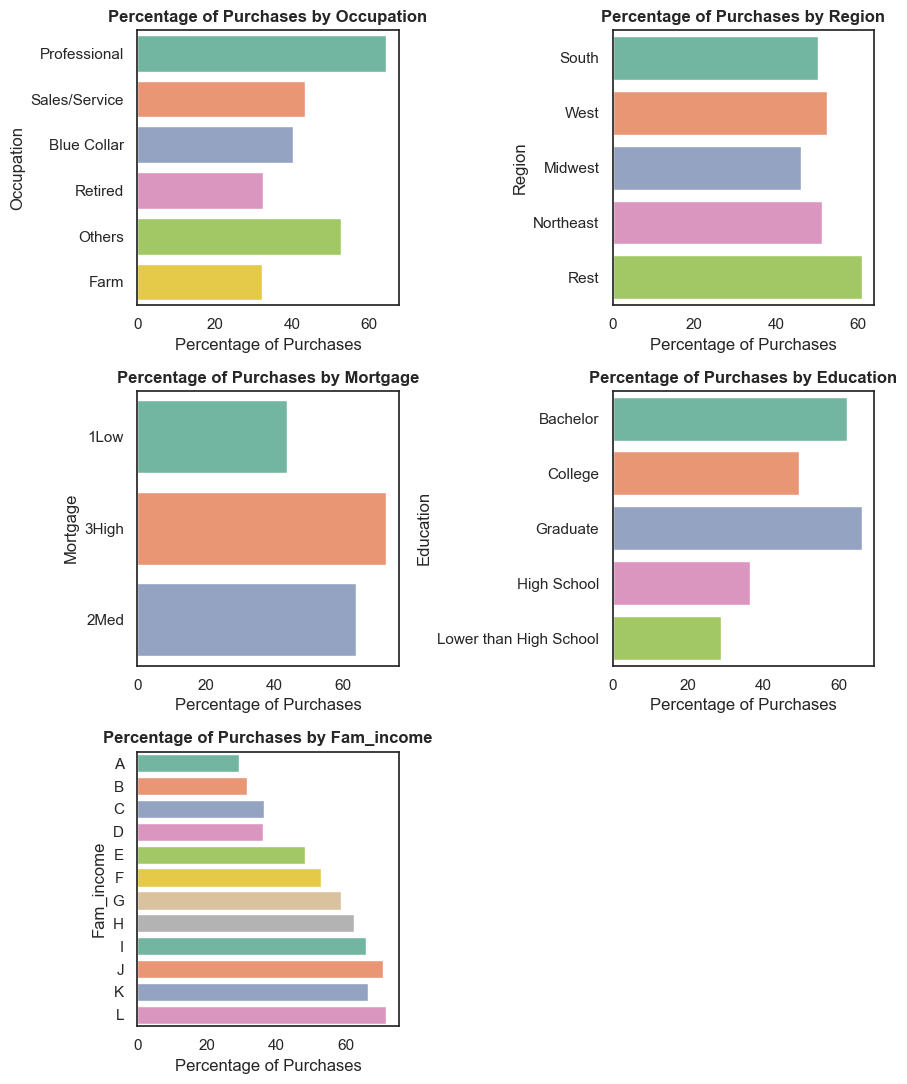

In [14]:

sns.set(style="white")

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 11))
axes = axes.flatten()

def plot_purchase_percentage_by_category_subplot(data, category, ax):

    total_per_category = data[category].value_counts()

    purchases_per_category = data[data['flag'] == "Yes"][category].value_counts()

    percentage_purchases = (purchases_per_category / total_per_category * 100).reset_index()
    percentage_purchases.columns = [category, 'Percentage of Purchases']

    sns.barplot(x='Percentage of Purchases', y=category, data=percentage_purchases, palette="Set2", ax=ax)
    ax.set_title(f'Percentage of Purchases by {category.capitalize()}', fontweight='bold')
    ax.set_ylabel('')
    ax.set_xlabel('Percentage of Purchases')
    ax.set_ylabel(category.capitalize())

categories = ["occupation", "region", "mortgage", "education", "fam_income"]

for category, ax in zip(categories, axes[:5]):
    plot_purchase_percentage_by_category_subplot(data, category, ax)

axes[-1].axis('off')

plt.tight_layout()
plt.show()